In [1]:
pip install info_gain

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#PCA
from sklearn.decomposition import PCA
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import pydotplus
from IPython.display import Image
from info_gain import info_gain
import pandas as pd
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#sex(female=1.male=0)
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [6]:
#PCA降維
''''df1 = data
pca = PCA(n_components='mle')
pca.fit(df1)
df_pca = pca.transform(df1)
print("original shape:   ", df1.shape)
print("transformed shape:", df_pca.shape)
df_pca'''

'\'df1 = data\npca = PCA(n_components=\'mle\')\npca.fit(df1)\ndf_pca = pca.transform(df1)\nprint("original shape:   ", df1.shape)\nprint("transformed shape:", df_pca.shape)\ndf_pca'

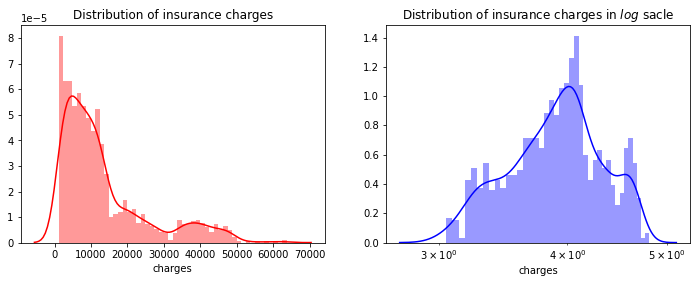

In [7]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

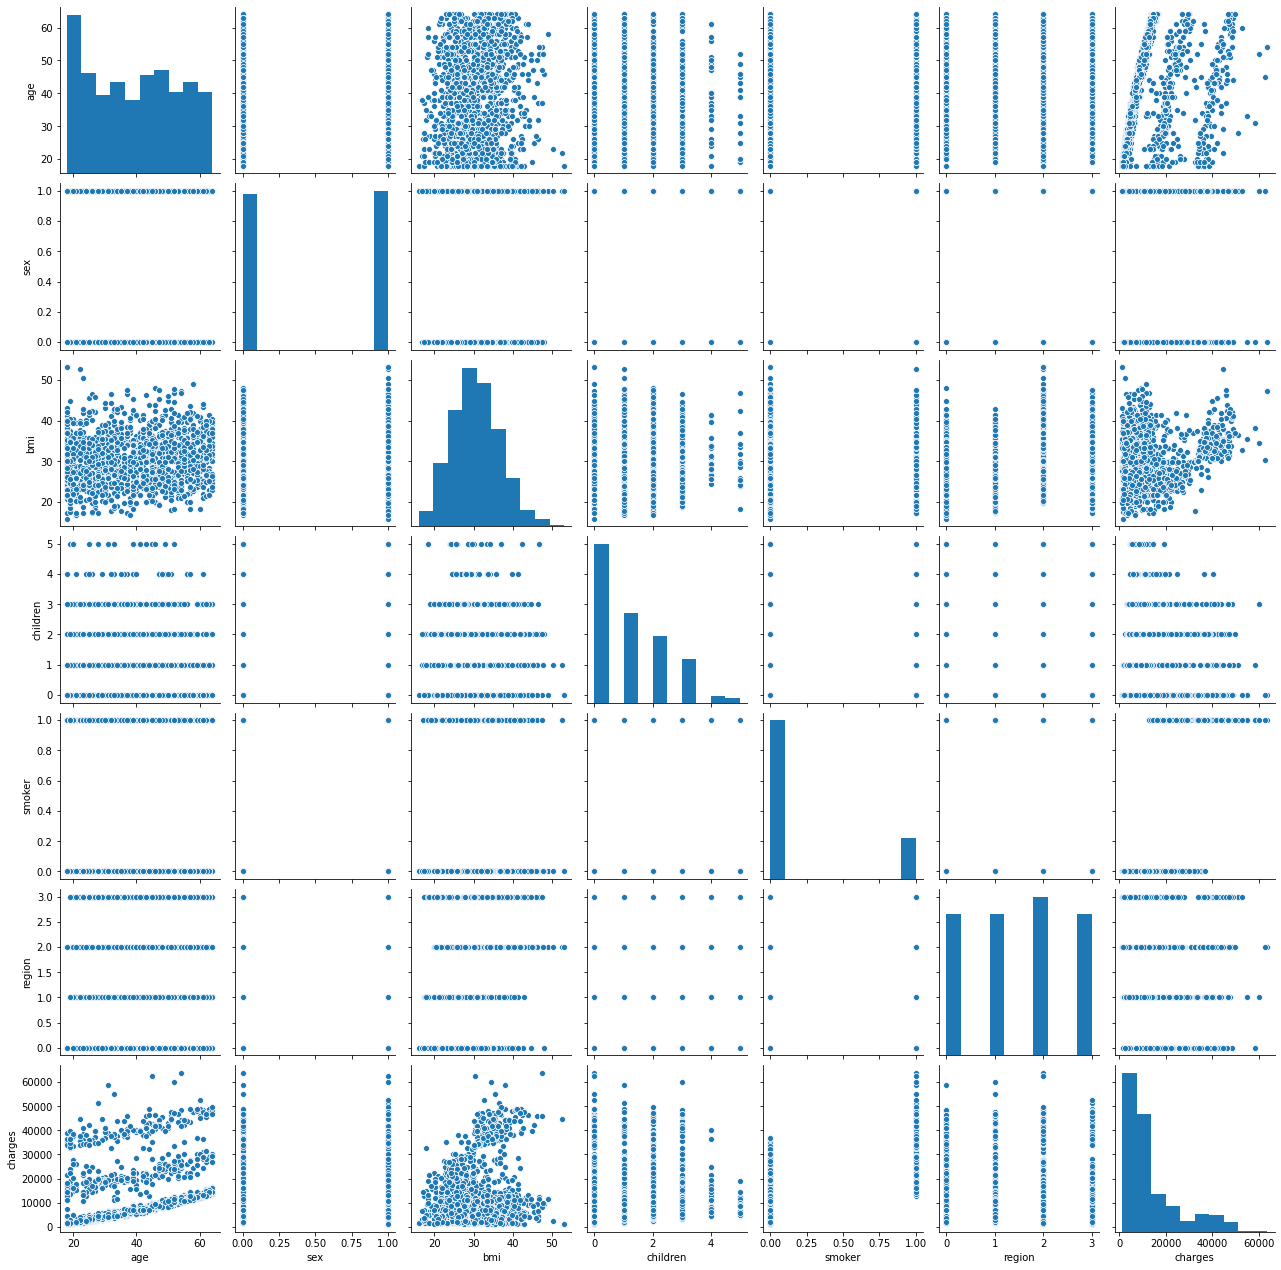

In [8]:
sns.pairplot(data)

In [9]:
data.corr()['charges'].sort_values()
#somke和charge有很大的關聯

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

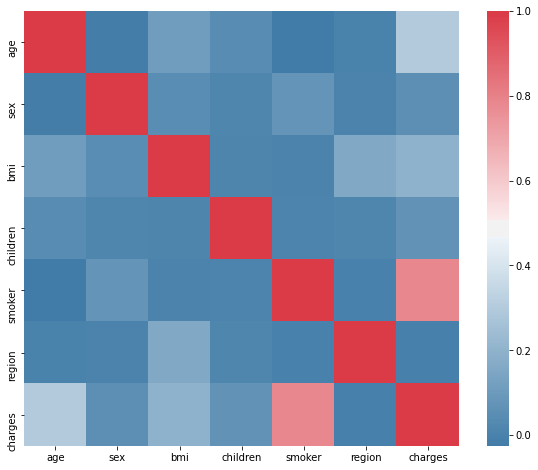

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)
#由圖可知somke和charge有很大的關聯

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


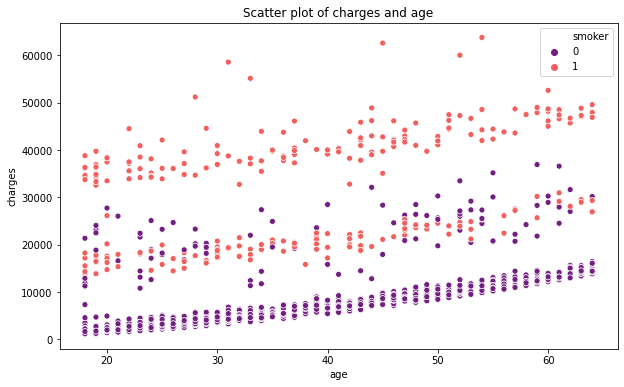

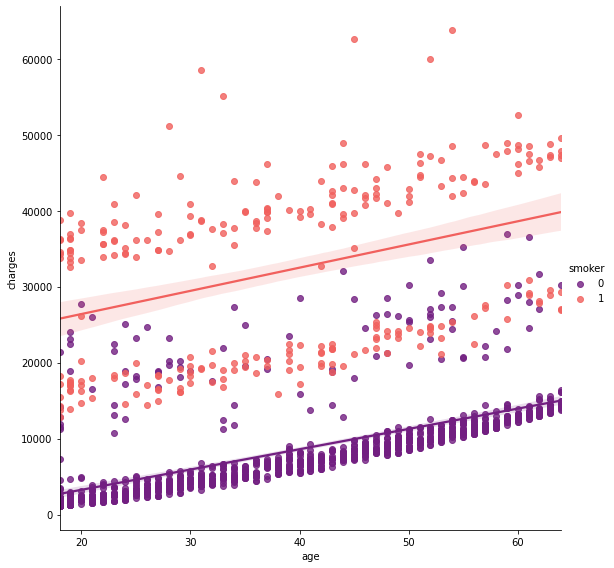

In [11]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and age')

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


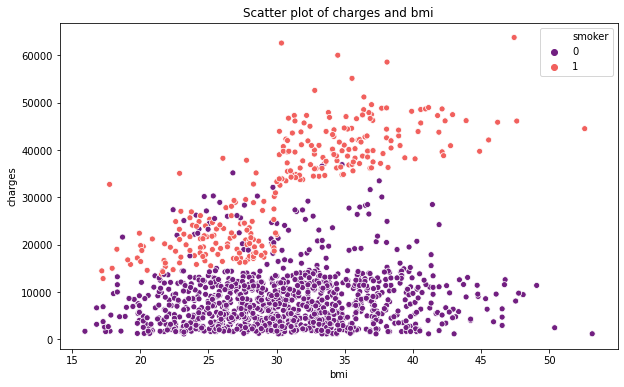

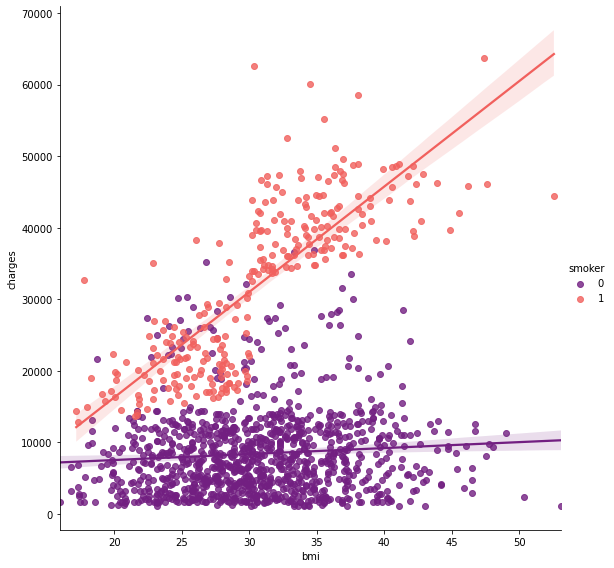

In [12]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

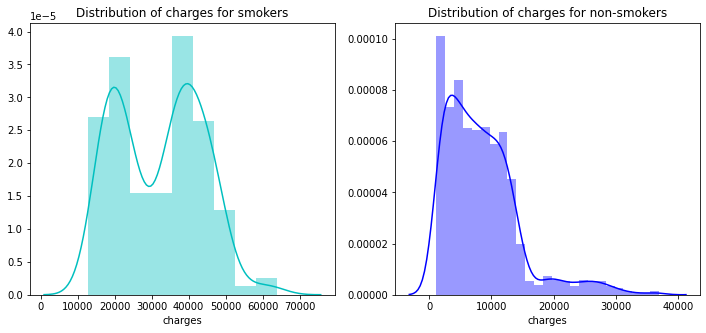

In [13]:
#Distribution of charges for smokers,Distribution of charges for non-smokers
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

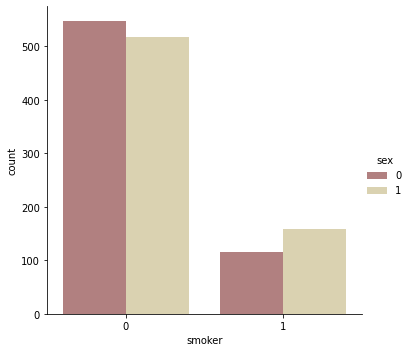

In [14]:
#male,female的smoker人數
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

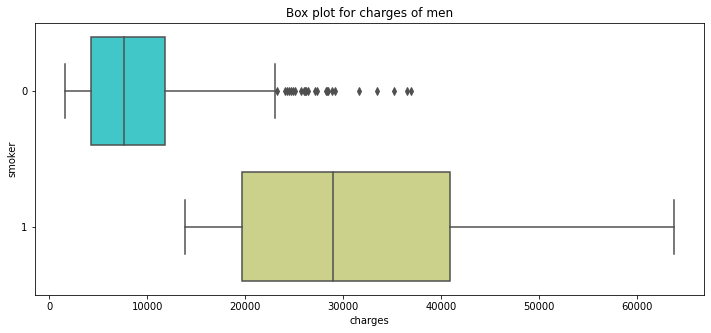

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

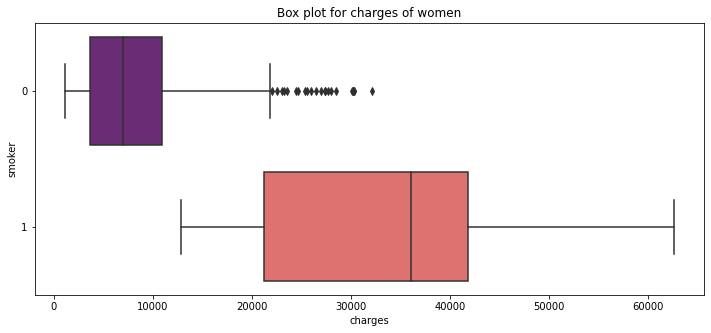

In [16]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

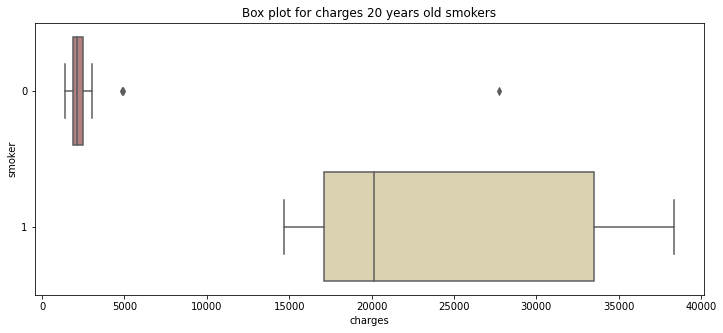

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 20 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 20)] , orient="h", palette = 'pink')

In [18]:
feature_names =['age', 'sex', 'bmi', 'children', 'smoker', 'region']
data['bmi'] = pd.cut(data['bmi'], bins= [0, 18.5, 25, 30, 35, 40, 60], labels=range(6))
data['age'] = pd.cut(data['age'], bins = [0, 20, 35, 50, 70],labels=range(4))
X = pd.DataFrame(data, columns=feature_names)
#裝箱法
cut_charge=pd.cut(data['charges'],3,labels=range(3))
y=cut_charge


#將資料切成train和test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=0)


Text(0, 0.5, 'Error Rate')

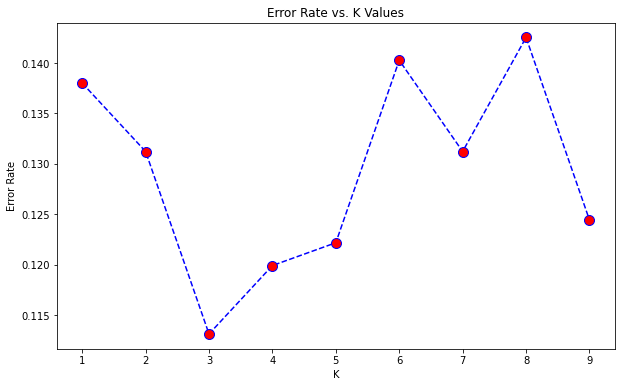

In [19]:
#用for loop來建立迴圈，選擇k值
error_rate = []

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#將k=1~6的錯誤率製圖畫出。k=6之後，錯誤率就在3.5%和0%之間震盪。
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
 #KNN演算法
 knn= KNeighborsClassifier(n_neighbors=3) #選Error Rate的k=3
 knn.fit(X_train,y_train)
 pred = knn.predict(X_test)

 #測試KNN演算法好壞
 #混淆矩陣
 print("混淆矩陣")
 print(confusion_matrix(y_test,pred))
 print('\n')
 #利用classificiation report來看precision、recall、f1-score、support
 print("classificiation report")
 print(classification_report(y_test,pred))

混淆矩陣
[[355   2   0]
 [ 31  30   1]
 [ 11   5   7]]


classificiation report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       357
           1       0.81      0.48      0.61        62
           2       0.88      0.30      0.45        23

    accuracy                           0.89       442
   macro avg       0.86      0.59      0.67       442
weighted avg       0.88      0.89      0.87       442



DecisionTree
訓練集正確率:  0.9308035714285714
測試集正確率:  0.9343891402714932
訓練集混淆矩陣: 
 [[741   1   0]
 [ 49  73   1]
 [  0  11  20]]
測試集混淆矩陣: 
 [[357   0   0]
 [ 21  40   1]
 [  0   7  16]]


[Text(152.45357142857142, 195.696, 'X[4] <= 0.5\nentropy = 0.787\nsamples = 896\nvalue = [742, 123, 31]'),
 Text(65.76428571428572, 152.208, 'X[3] <= 0.5\nentropy = 0.275\nsamples = 717\nvalue = [683, 34, 0]'),
 Text(35.871428571428574, 108.72, 'X[2] <= 3.5\nentropy = 0.156\nsamples = 310\nvalue = [303, 7, 0]'),
 Text(23.914285714285715, 65.232, 'X[5] <= 1.5\nentropy = 0.193\nsamples = 236\nvalue = [229, 7, 0]'),
 Text(11.957142857142857, 21.744, 'entropy = 0.118\nsamples = 126\nvalue = [124, 2, 0]'),
 Text(35.871428571428574, 21.744, 'entropy = 0.267\nsamples = 110\nvalue = [105, 5, 0]'),
 Text(47.82857142857143, 65.232, 'entropy = 0.0\nsamples = 74\nvalue = [74, 0, 0]'),
 Text(95.65714285714286, 108.72, 'X[0] <= 2.5\nentropy = 0.352\nsamples = 407\nvalue = [380, 27, 0]'),
 Text(71.74285714285715, 65.232, 'X[5] <= 0.5\nentropy = 0.263\nsamples = 314\nvalue = [300, 14, 0]'),
 Text(59.785714285714285, 21.744, 'entropy = 0.483\nsamples = 67\nvalue = [60, 7, 0]'),
 Text(83.7, 21.744, 'ent

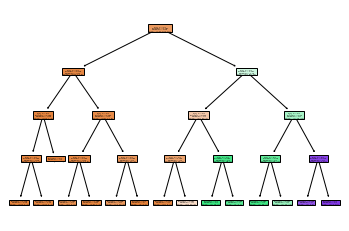

In [21]:
#DecisionTree
dt = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(X_train,y_train)
print('DecisionTree')
print('訓練集正確率: ', dt.score(X_train,y_train))
print('測試集正確率: ', dt.score(X_test,y_test))
cnf=confusion_matrix(y_train,dt.predict(X_train))
print('訓練集混淆矩陣: \n', cnf)
cnf=confusion_matrix(y_test,dt.predict(X_test))
print('測試集混淆矩陣: \n', cnf)
tree.plot_tree(dt, filled=True)

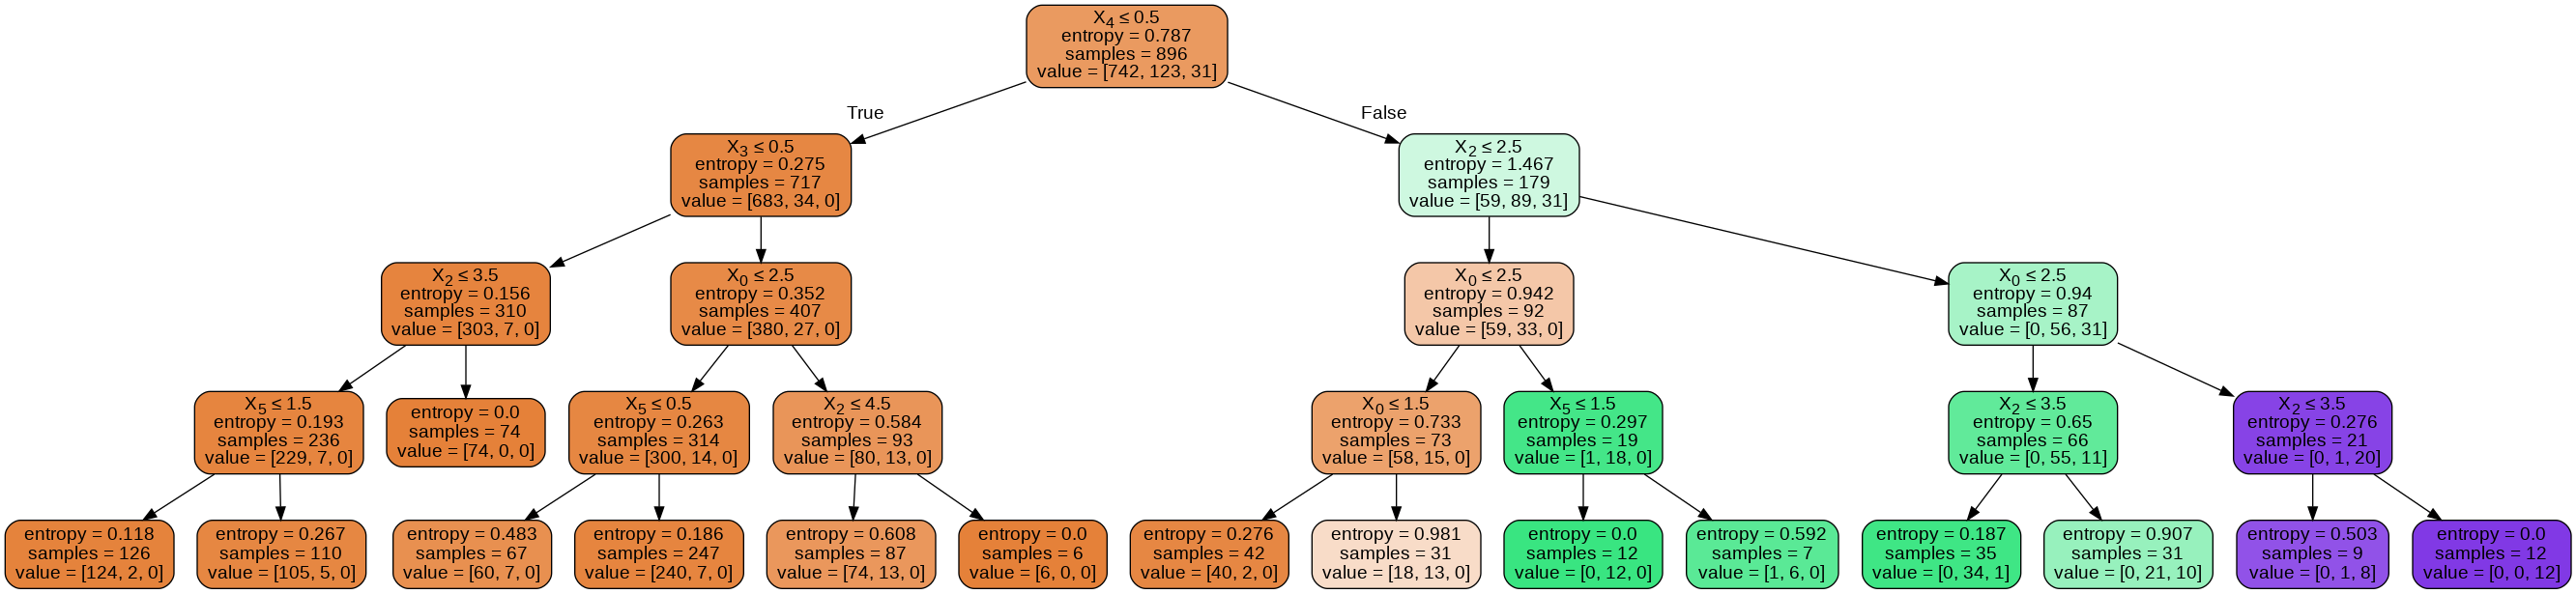

In [22]:
#產生決策樹的圖檔
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [23]:
#使用隨機森林
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要用多少CART樹(CART樹圍使用GIN算法的決策樹)
rfc =RandomForestClassifier(n_estimators=5)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
#利用confusion matrix來看看實際即預測差異
print("混淆矩陣")
print(confusion_matrix(y_test,rfc_pred))
print('\n')
#利用classificiation report來看precision、recall、f1-score、support
print("classificiation report")
print(classification_report(y_test,rfc_pred))

混淆矩陣
[[340  17   0]
 [ 18  39   5]
 [  0   6  17]]


classificiation report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       357
           1       0.63      0.63      0.63        62
           2       0.77      0.74      0.76        23

    accuracy                           0.90       442
   macro avg       0.78      0.77      0.78       442
weighted avg       0.90      0.90      0.90       442



In [24]:
#GaussianNB 貝氏
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB(priors = None)
g_nb_fit = g_nb.fit(X_train, y_train)

g_nb_pred = g_nb.predict(X_test)
print("混淆矩陣")
print(confusion_matrix(y_test,g_nb_pred))
print('\n')
print("classificiation report")
print(classification_report(y_test,g_nb_pred))

混淆矩陣
[[333   6  18]
 [ 14   1  47]
 [  0   0  23]]


classificiation report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       357
           1       0.14      0.02      0.03        62
           2       0.26      1.00      0.41        23

    accuracy                           0.81       442
   macro avg       0.45      0.65      0.46       442
weighted avg       0.81      0.81      0.79       442



In [ ]:
print(data)